# Pregunta  1

El problema XOR es un problema de clasificación donde los datos, en este caso puntos en el rectángulo $[-1,1]\times[-1,1]$ poseen etiquetas correspondientes al resultado de la función lógica XOR dadas sus coordenadas espaciales. Por ejemplo, $ XOR(-0.11,-0.89) = -1$, $XOR(-0.56, 0) = 1$, y así. 

La regla XOR por lo tanto particiona el espacio en dos clases disjuntas, los cuadrantes 1 y 3 pertenecen a la clase donde $XOR(x_1,x_2) = -1$ (pues sus signos coinciden) y los cuadrantes 2 y 4 pertenecen a la clase donde $XOR(x_1, x_2) = 1$ (pues sus signos difieren). Dicho particionamiento hace que la clasificación sea un problema no linealmente separable.

## a) Generación de data para XOR

In [1]:
import numpy as np

In [2]:
def do_XOR(n=1000,noisy_n=100,svm=False, rnd_state=0):
    rng = np.random.RandomState(rnd_state)
    X_train = rng.uniform(low=-1.0,high=1.0,size=(n,2))
    Y_train = np.logical_xor(X_train[:,0] > 0, X_train[:,1] > 0)
    Y_train = 2*Y_train-1 if svm else Y_train
    X_noisy= rng.uniform(low=-0.8,high=0.2,size=(noisy_n,2))
    Y_noisy = -1*np.logical_xor(X_noisy[:,0] > 0, X_noisy[:,1] > 0) + 1
    Y_noisy = 2*Y_noisy-1 if svm else Y_noisy
    X_train = np.vstack((X_train, X_noisy))
    Y_train = np.hstack((Y_train, Y_noisy))
    X_test = rng.uniform(low=-1.0,high=1.0,size=(n,2))
    Y_test = np.logical_xor(X_test[:,0] > 0, X_test[:,1] > 0)
    Y_test = 2*Y_test - 1 if svm else Y_test
    return X_train,Y_train,X_test,Y_test

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

def plot_dataset(X_train, Y_train, X_test, Y_test):
    f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(16,8))
    ax1.set_title("Train data", fontsize=20)
    ax1.grid(color='k', linestyle='--', linewidth=1)
    class1 = Y_train == 1
    class2 = Y_train == 0
    ax1.plot(X_train[class1, 0], X_train[class1, 1], 'bo', mew=0, label=r"$XOR(x_1, x_2) = 1$")
    ax1.plot(X_train[class2, 0], X_train[class2, 1], 'ro', mew=0, label=r"$XOR(x_1, x_2) = 0$")
    ax1.set_xticks([-1, 0, 1])
    ax1.set_yticks([-1, 0, 1])
    box = ax1.get_position()
    ax1.set_position([box.x0, box.y0, box.width, box.height])
    plt.grid()
    ax1.legend(loc='lower center', bbox_to_anchor=(0.5, -0.25), fontsize=20)

    ax2.set_title("Test data", fontsize=20)
    ax2.grid(color='k', linestyle='--', linewidth=1)
    class1 = Y_test == 1
    class2 = Y_test == 0
    ax2.plot(X_test[class1, 0], X_test[class1, 1], 'ro', mew=0, label=r"$XOR(x_1, x_2) = 1$")
    ax2.plot(X_test[class2, 0], X_test[class2, 1], 'bo', mew=0, label=r"$XOR(x_1, x_2) = 0$")
    ax2.set_xticks([-1, 0, 1])
    ax2.set_yticks([-1, 0, 1])
    box = ax2.get_position()
    ax2.set_position([box.x0, box.y0, box.width, box.height])
    ax2.legend(loc='lower center', bbox_to_anchor=(0.5, -0.25), fontsize=20)
    plt.show()

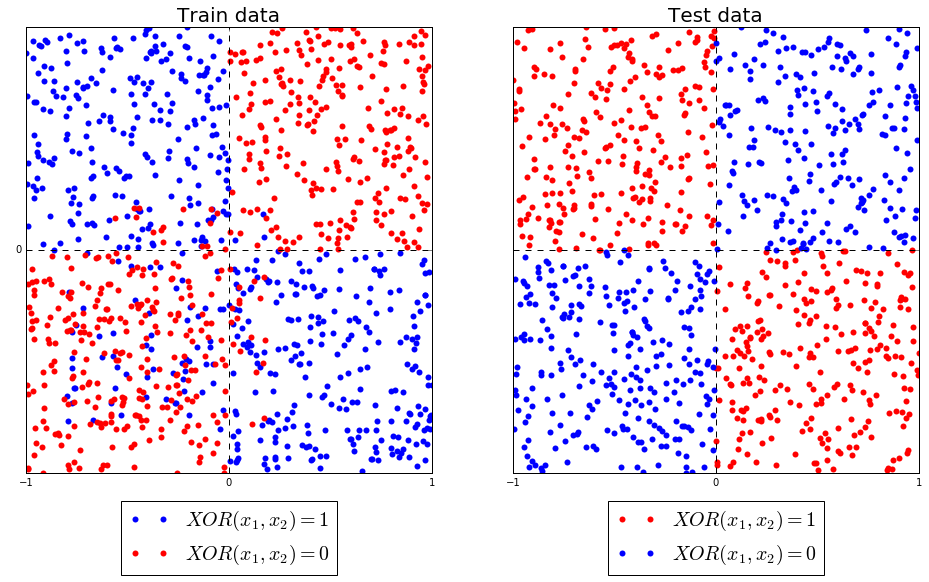

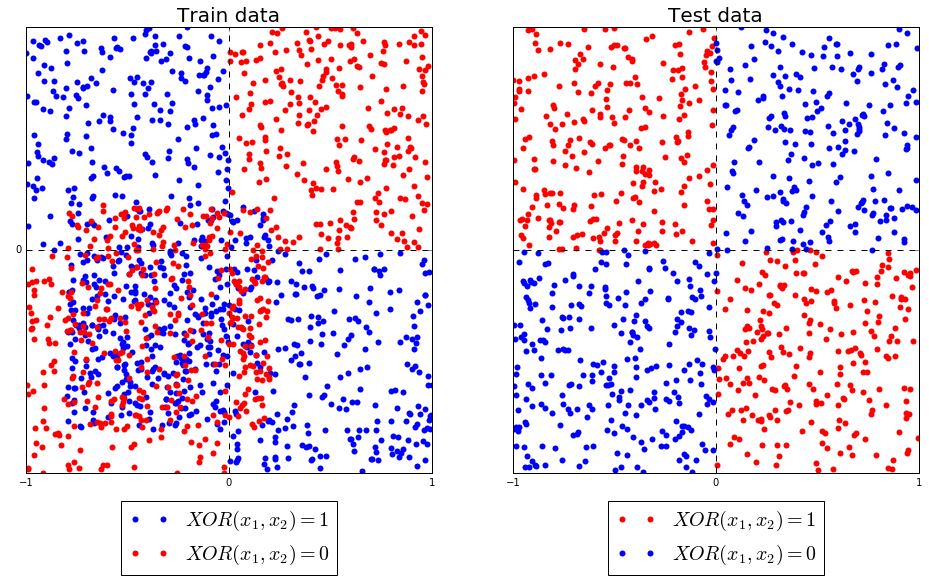

In [6]:
X_train, Y_train, X_test, Y_test = do_XOR(noisy_n=100)
plot_dataset(X_train, Y_train, X_test, Y_test)
X_train, Y_train, X_test, Y_test = do_XOR(noisy_n=500)
plot_dataset(X_train, Y_train, X_test, Y_test)

## b) SVM Lineal para resolver XOR

In [4]:
X_train, Y_train, X_test, Y_test = do_XOR(noisy_n=100, svm=True)

In [24]:
%matplotlib inline
from matplotlib import colors
import matplotlib.pyplot as plt
background_cmap = colors.ListedColormap(['#9690FF', '#FFA6A6'])
rev_background_cmap = colors.ListedColormap(['#FFA6A6', '#9690FF'])
dots_cmap = colors.ListedColormap(['#000595', '#EB0000'])

def plot_classifier(clf,X_train,Y_train,X_test,Y_test,model_type, title):
    f, axis = plt.subplots(1, 1, sharex='col', sharey='row',figsize=(20, 20))
    axis.set_title(title, fontsize=20)
    axis.scatter(X_train[:,0],X_train[:,1],s=15,c=Y_train,zorder=10,cmap=dots_cmap, edgecolor='',marker='d')
    axis.scatter(X_test[:,0],X_test[:,1],s=30,c=Y_test,zorder=10,cmap=dots_cmap, edgecolor='',marker='o')
    XX, YY = np.mgrid[-1:1:200j, -1:1:200j]
    if model_type == 'svm':
        Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
    elif model_type == 'tree':
        Z = clf.predict_proba(np.c_[XX.ravel(), YY.ravel()])[:,0]
    elif model_type == 'ann':
        Z = clf.predict(np.c_[XX.ravel(), YY.ravel()])
    else: raise ValueError('model type not supported')
    Z = Z.reshape(XX.shape)
    Zplot = Z > 0 if model_type == 'svm' else Z > 0.5
    if model_type == 'tree':
        axis.pcolormesh(XX, YY, Zplot ,cmap=rev_background_cmap)
    else:
        axis.pcolormesh(XX, YY, Zplot ,cmap=background_cmap)
    if model_type == 'svm' or type == 'tree':
        axis.contour(XX, YY, Z, alpha=1, colors=['k','k','k'],
            linestyles=['--', '--', '--'],levels=[-1, 0, 1],linewidths=[2,2,2])
    else:
        axis.contour(XX, YY, Z, alpha=1, colors=['k'],
            linestyles=['--'],levels=[0.5],linewidths=[2])
    plt.show()

In [10]:
from sklearn.svm import LinearSVC

svms_group1 = []
svms_group2 = []
svms_group3 = []

K = np.arange(-4, 5, 1)
C = np.power(2.0, K)
for c in C:
    print "Resultados para c =",c
    svm = LinearSVC(C=c, penalty='l2', dual=False)
    svm.fit(X_train, Y_train)
    svms_group1.append(svm)
    print "\t Sin resolver problema dual, pérdida L2. \t Score:", svm.score(X_test, Y_test)
    
    svm = LinearSVC(C=c, penalty='l1', dual=False)
    svm.fit(X_train, Y_train)
    svms_group2.append(svm)
    print "\t Sin resolver problema dual, pérdida L1. \t Score:", svm.score(X_test, Y_test)
    
    svm = LinearSVC(C=c, penalty='l2', dual=True)
    svm.fit(X_train, Y_train)
    svms_group3.append(svm)
    print "\t Con resolver problema dual, pérdida L2. \t Score:", svm.score(X_test, Y_test)
    
    print 

Resultados para c = 0.0625
	 Sin resolver problema dual, pérdida L2. 	 Score: 0.471
	 Sin resolver problema dual, pérdida L1. 	 Score: 0.487
	 Con resolver problema dual, pérdida L2. 	 Score: 0.471

Resultados para c = 0.125
	 Sin resolver problema dual, pérdida L2. 	 Score: 0.471
	 Sin resolver problema dual, pérdida L1. 	 Score: 0.489
	 Con resolver problema dual, pérdida L2. 	 Score: 0.471

Resultados para c = 0.25
	 Sin resolver problema dual, pérdida L2. 	 Score: 0.471
	 Sin resolver problema dual, pérdida L1. 	 Score: 0.48
	 Con resolver problema dual, pérdida L2. 	 Score: 0.471

Resultados para c = 0.5
	 Sin resolver problema dual, pérdida L2. 	 Score: 0.471
	 Sin resolver problema dual, pérdida L1. 	 Score: 0.477
	 Con resolver problema dual, pérdida L2. 	 Score: 0.471

Resultados para c = 1.0
	 Sin resolver problema dual, pérdida L2. 	 Score: 0.471
	 Sin resolver problema dual, pérdida L1. 	 Score: 0.475
	 Con resolver problema dual, pérdida L2. 	 Score: 0.471

Resultados para

En general el parámetro de regularización mejora debilmente el rendimiento de la SVM, por otra parte la SVM con pérdida L1 posee mejores resultados que utilizando pérdida L2, y no se observan diferencias entre resolver el problema en su forma dual o no. Naturalmente estos scores no indican un buen rendimiento, de hecho al haber dos clases es mejor lanzar una moneda al aire y adivinar la clase, antes que utilizar una SVM lineal.

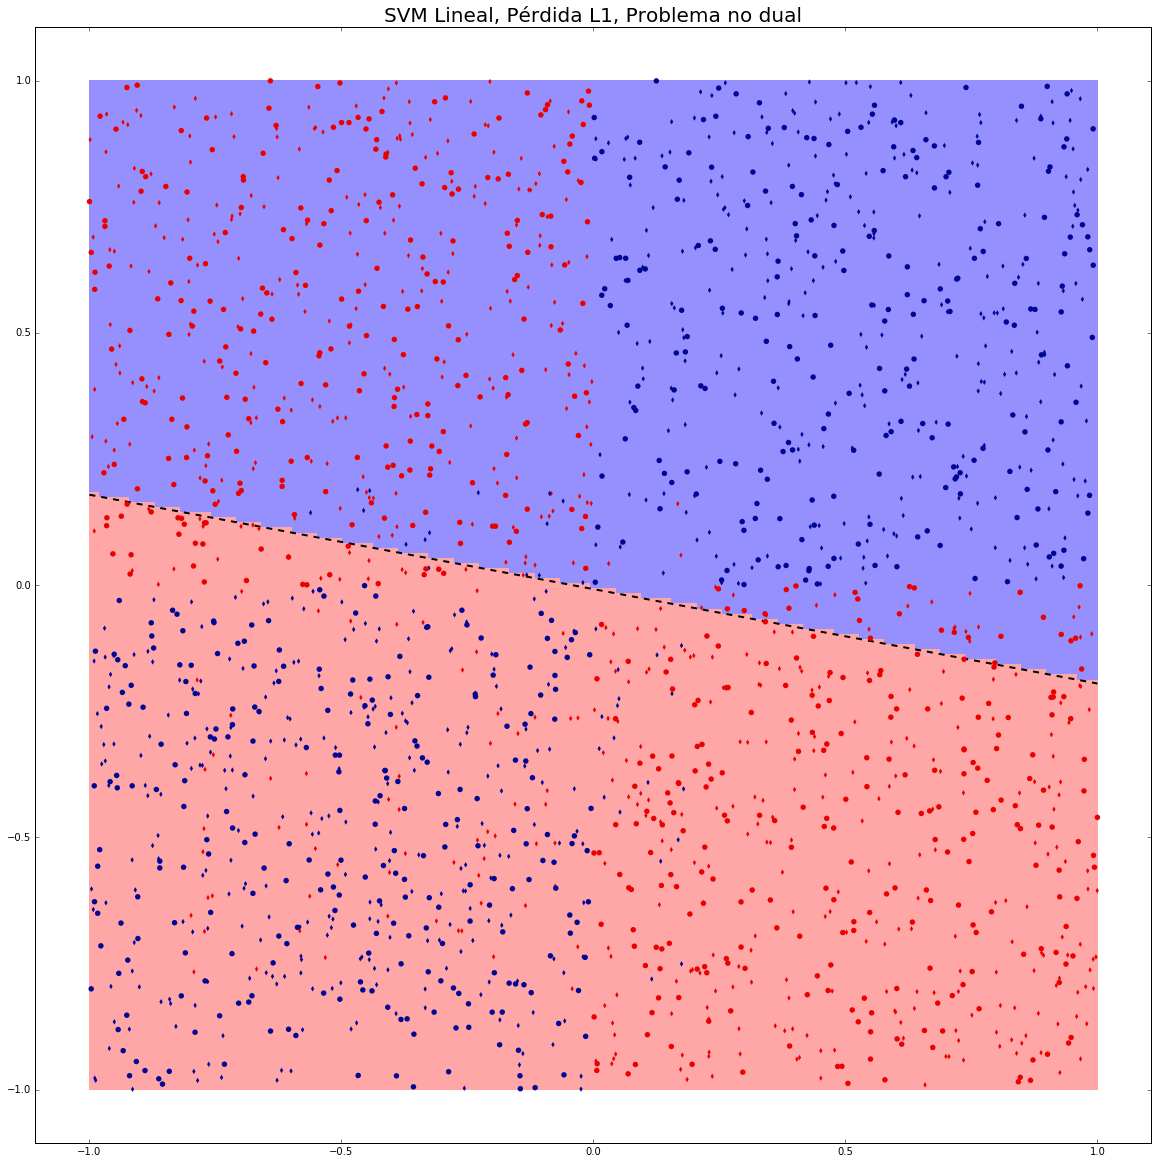

In [11]:
plot_classifier(svms_group2[1],X_train,Y_train,X_test,Y_test,'svm', u"SVM Lineal, Pérdida L1, Problema no dual")

Naturalmente la frontera generada es un hiperplano que no puede, por construcción, dividir las clases disjuntas destacadas en el gráfico. Hará falta otra clase de máquina con fronteras más flexibles, o con capacidad de fronteras disjuntas.

## c) SVM no lineal para resolver XOR

Kernel RBF, c = 0.25 	Train Accuracy = 0.885455
Kernel RBF, c = 0.25 	Test Accuracy = 0.944000


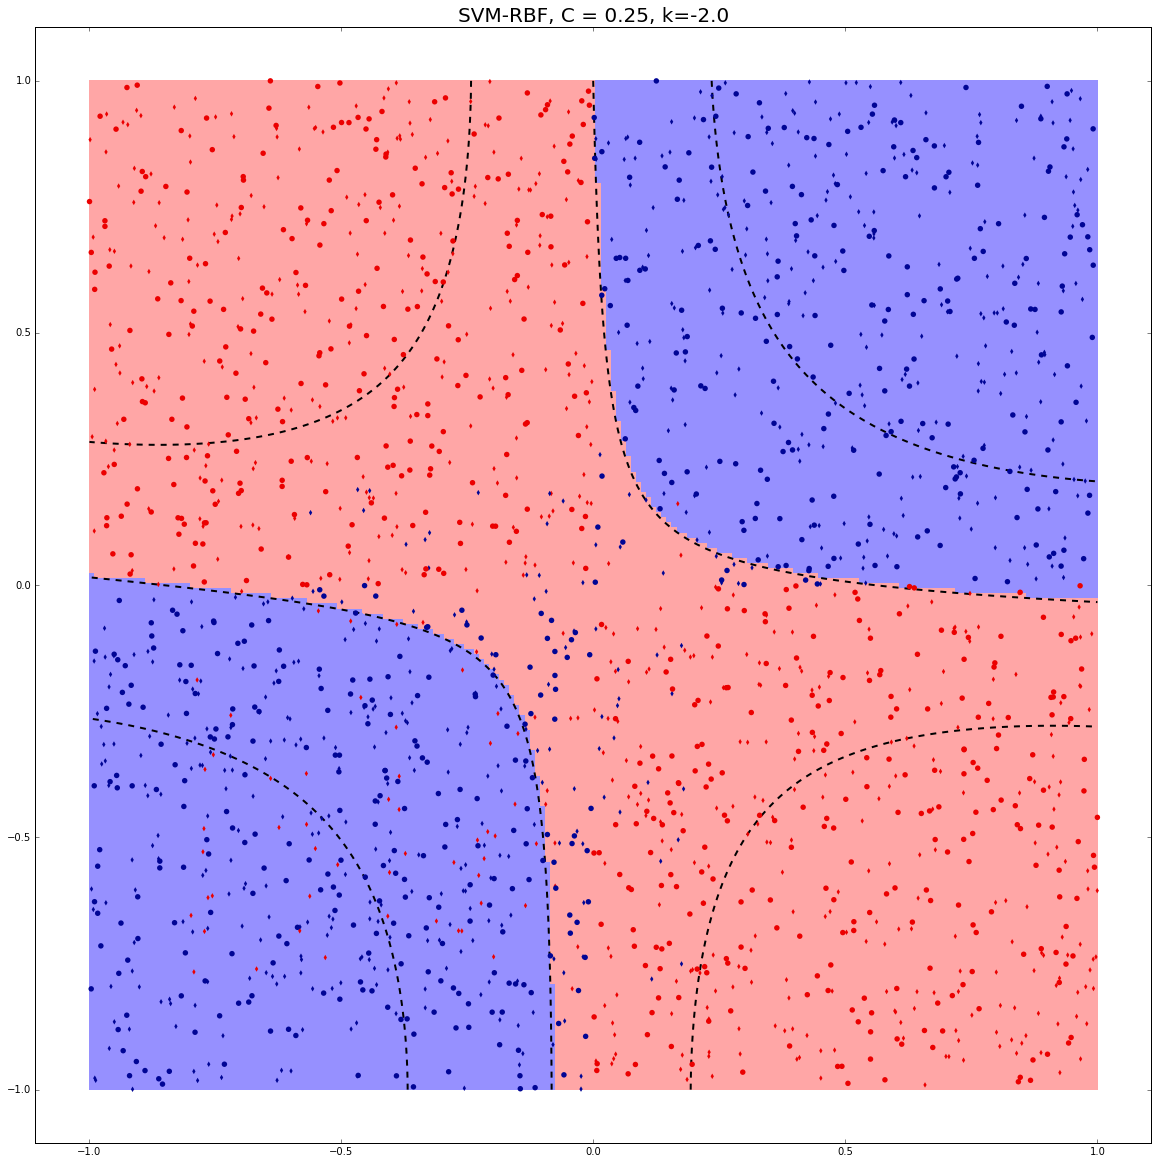

Kernel Poly, c =  0.25 	Train Accuracy = 0.880000
Kernel Poly, c =  0.25 	Test Accuracy = 0.935000


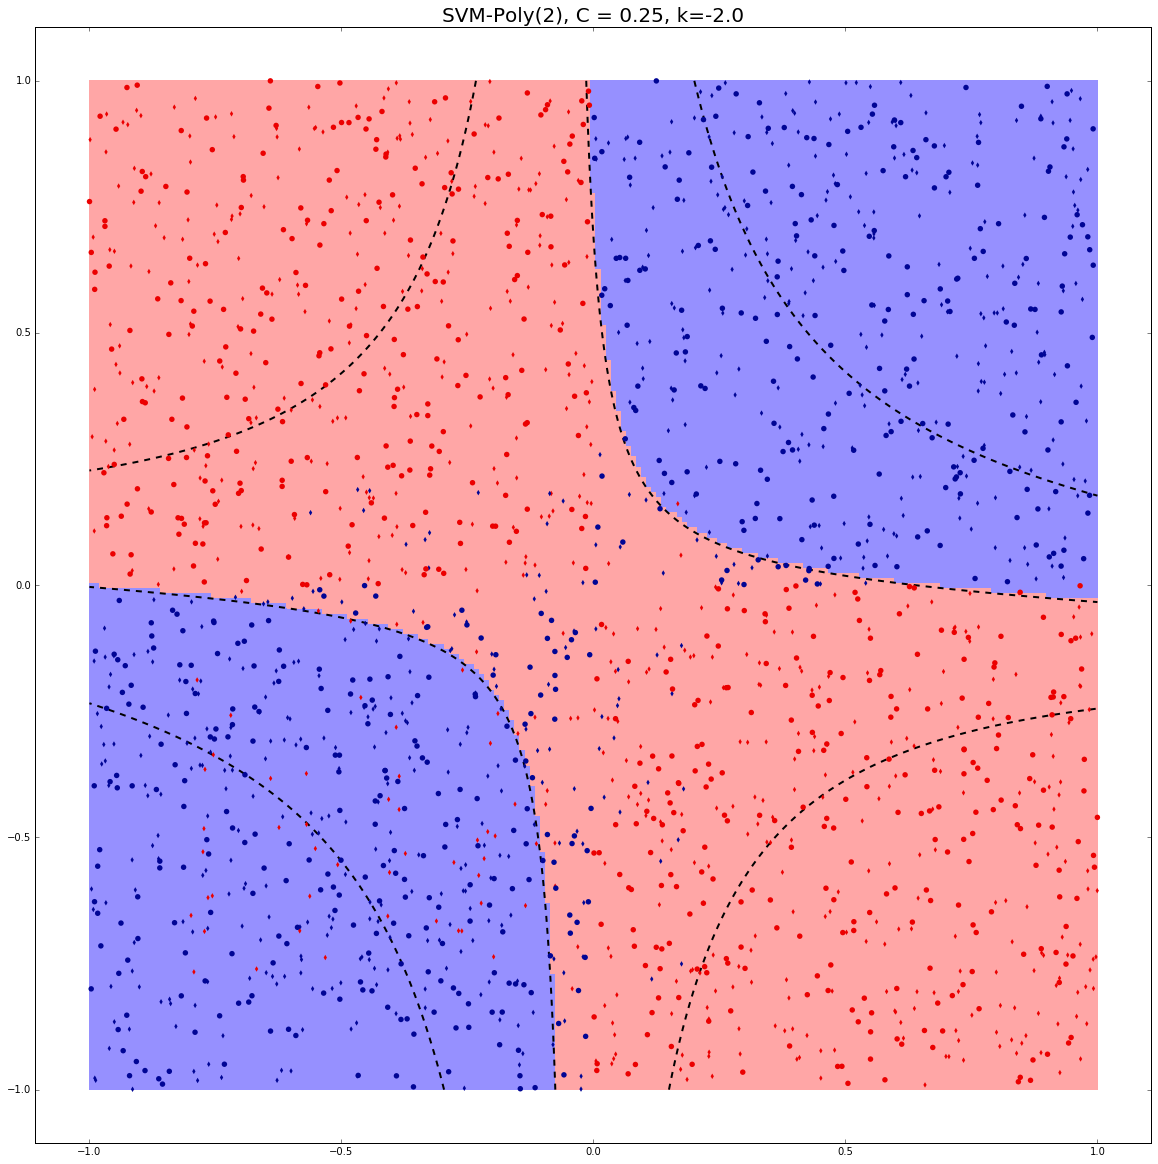

Kernel RBF, c = 0.5 	Train Accuracy = 0.890000
Kernel RBF, c = 0.5 	Test Accuracy = 0.959000
Kernel Poly, c =  0.5 	Train Accuracy = 0.887273
Kernel Poly, c =  0.5 	Test Accuracy = 0.943000
Kernel RBF, c = 1.0 	Train Accuracy = 0.887273
Kernel RBF, c = 1.0 	Test Accuracy = 0.954000
Kernel Poly, c =  1.0 	Train Accuracy = 0.888182
Kernel Poly, c =  1.0 	Test Accuracy = 0.952000
Kernel RBF, c = 2.0 	Train Accuracy = 0.890909
Kernel RBF, c = 2.0 	Test Accuracy = 0.959000
Kernel Poly, c =  2.0 	Train Accuracy = 0.883636
Kernel Poly, c =  2.0 	Test Accuracy = 0.943000
Kernel RBF, c = 4.0 	Train Accuracy = 0.901818
Kernel RBF, c = 4.0 	Test Accuracy = 0.970000
Kernel Poly, c =  4.0 	Train Accuracy = 0.887273
Kernel Poly, c =  4.0 	Test Accuracy = 0.946000
Kernel RBF, c = 8.0 	Train Accuracy = 0.902727
Kernel RBF, c = 8.0 	Test Accuracy = 0.972000


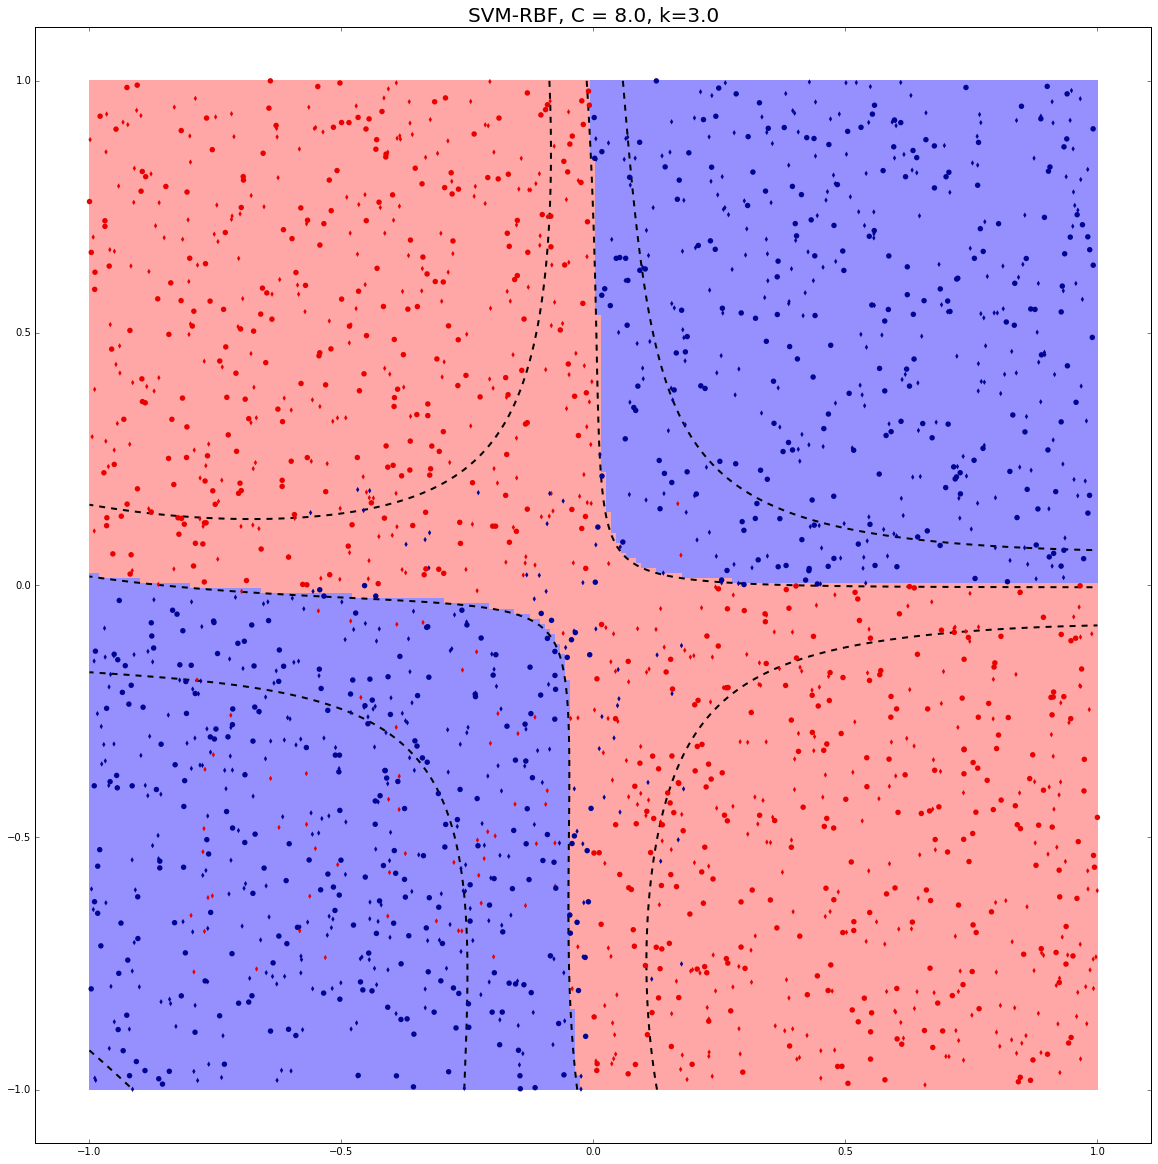

Kernel Poly, c =  8.0 	Train Accuracy = 0.887273
Kernel Poly, c =  8.0 	Test Accuracy = 0.955000


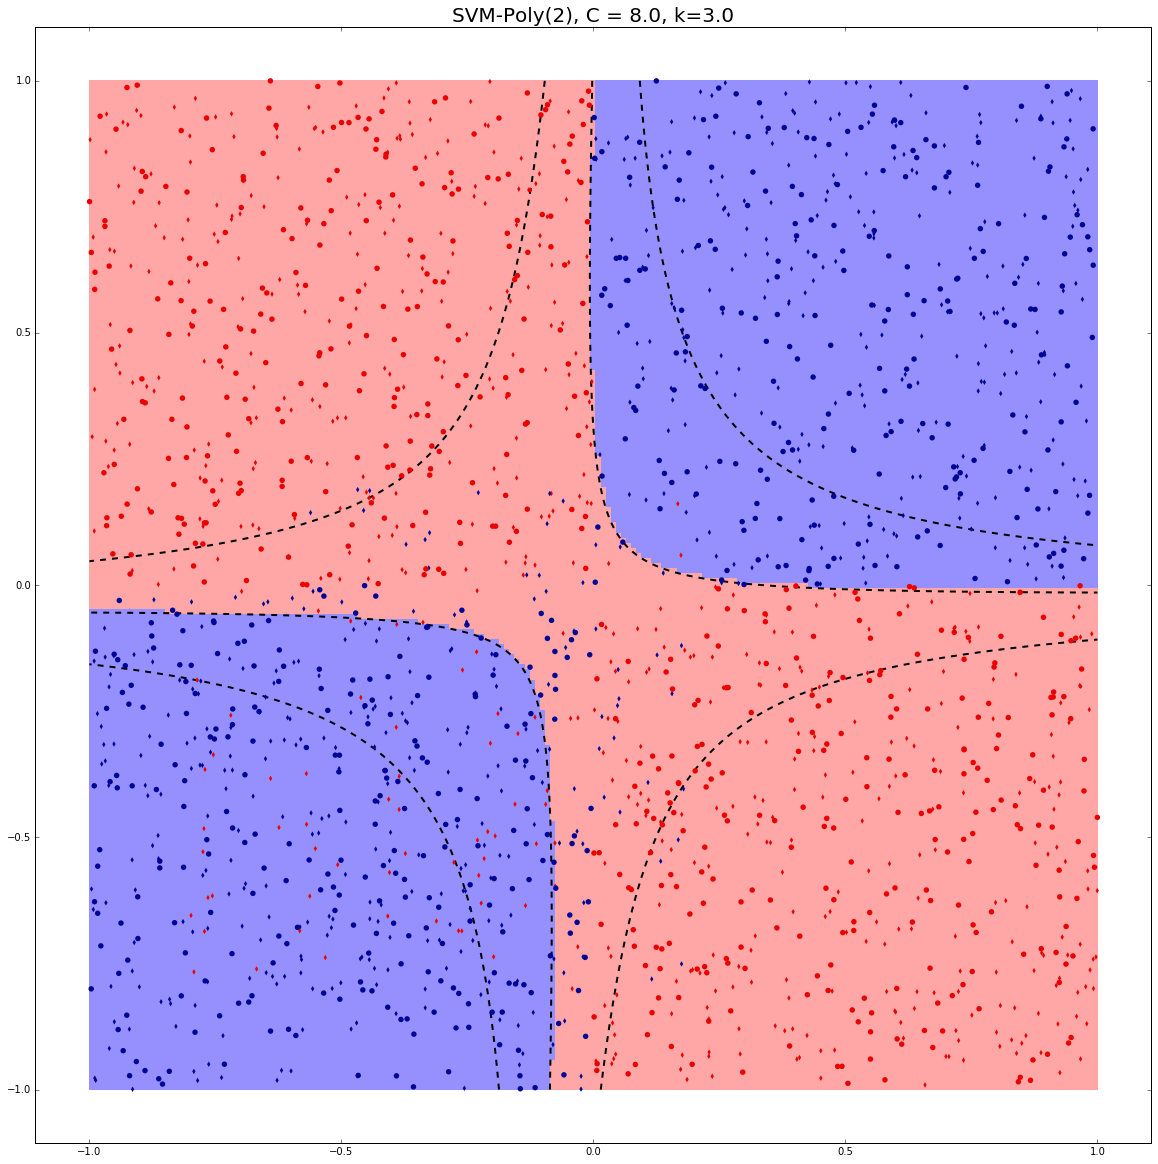

Kernel RBF, c = 16.0 	Train Accuracy = 0.898182
Kernel RBF, c = 16.0 	Test Accuracy = 0.970000
Kernel Poly, c =  16.0 	Train Accuracy = 0.890000
Kernel Poly, c =  16.0 	Test Accuracy = 0.949000


In [12]:
from sklearn.svm import SVC

train_accs_rbf = []
test_accs_rbf = []
train_accs_poly = []
test_accs_poly = []
K = np.arange(-2, 5, 1)
C = np.power(2.0, K)

for c in C:
    clf = SVC(C=c, kernel='rbf')
    clf.fit(X_train, Y_train)
    train_accs_rbf.append(clf.score(X_train,Y_train))
    test_accs_rbf.append(clf.score(X_test,Y_test))
    print "Kernel RBF, c =",c,"\tTrain Accuracy = %f"%train_accs_rbf[-1]
    print "Kernel RBF, c =",c,"\tTest Accuracy = %f"%test_accs_rbf[-1]
    if c == 2**3 or c == 2**-2:
        plot_classifier(clf,X_train,Y_train,X_test,Y_test,'svm','SVM-RBF, C = '+str(c)+', k='+str(np.log2(c)))
    
    clf = SVC(C=c, kernel='poly',degree=2, coef0=1)
    clf.fit(X_train, Y_train)
    train_accs_poly.append(clf.score(X_train,Y_train))
    test_accs_poly.append(clf.score(X_test,Y_test))
    print "Kernel Poly, c = ",c,"\tTrain Accuracy = %f"%train_accs_poly[-1]
    print "Kernel Poly, c = ",c,"\tTest Accuracy = %f"%test_accs_poly[-1]
    if c == 2**3 or c == 2**-2:
        plot_classifier(clf,X_train,Y_train,X_test,Y_test,'svm','SVM-Poly(2), C = '+str(c)+', k='+str(np.log2(c)))

En general los gráficos lucen similares, todos particionan la región en una región conexa para una clase y dos regiones disjuntas para la otra clase. La forma en que se dirime el límite de la región en el origen está relacionada también con la accuracy obtenida, pues se observa que mientras mejor se intenta aproximar la frontera en dicha zona, mejor es la accuracy. Por ejemplo, cualitativamente, el kernel RBF aproxima mejor esa zona sin descuidar el resto de las fronteras.

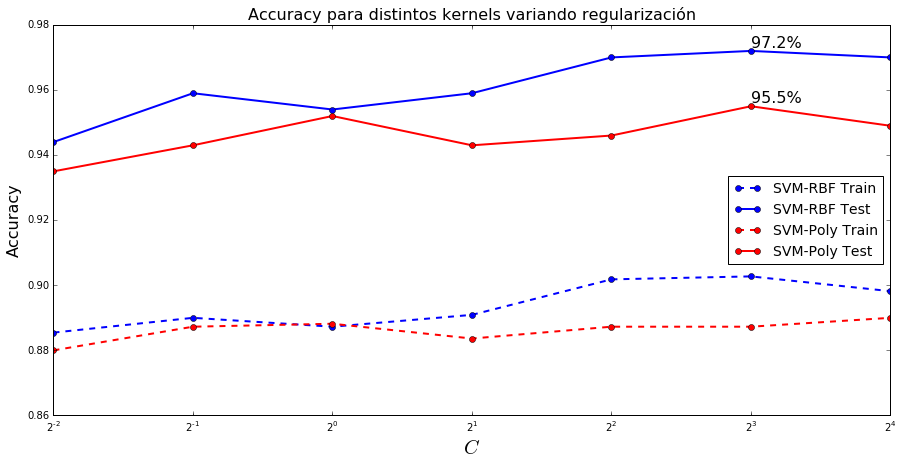

In [13]:
br_rbf_id = np.argmax(test_accs_rbf)
br_rbf = str(test_accs_rbf[br_rbf_id] * 100)+"%"

br_poly_id = np.argmax(test_accs_poly)
br_poly = str(test_accs_poly[br_poly_id] * 100)+"%"

plt.figure(figsize=(15, 7))
plt.title(u"Accuracy para distintos kernels variando regularización", fontsize=16)
plt.semilogx(C, train_accs_rbf, 'bo--', lw=2.0, label="SVM-RBF Train", basex=2)
plt.semilogx(C, test_accs_rbf, 'bo-', lw=2.0, label="SVM-RBF Test", basex=2)
plt.semilogx(C, train_accs_poly, 'ro--', lw=2.0, label="SVM-Poly Train", basex=2)
plt.semilogx(C, test_accs_poly, 'ro-', lw=2.0, label="SVM-Poly Test", basex=2)
plt.text(C[br_rbf_id], test_accs_rbf[br_rbf_id]+1e-3, br_rbf, fontsize=16)
plt.text(C[br_poly_id], test_accs_poly[br_poly_id]+1e-3, br_poly, fontsize=16)
plt.xlabel("$C$", fontsize=20)
plt.ylabel("Accuracy", fontsize=16)
plt.xticks(C)
plt.legend(loc='best', fontsize=14)
plt.show()

En el gráfico de accuracy como función de C podemos observar que, en primer lugar, con cualquiera de ambos kernels utilizados y un parámetro de regularización bien elegido obtenemos sobre un 95% de precisión en nuestros datos de prueba, lo que permite concluir que estamos resolviendo satisfactoriamente el problema de XOR (¡somos al menos 45% mejores que lanzando monedas!)

Los kernels implementados efectivamente particionan la región en dos conjuntos bastante similares a los teóricos. El mejor resultado obtenido es utilizando kernel RBF con 97.2% de precisión. El mejor resultado con kernel polinomial alcanza 95.5% de precisión, ambos utilizando como parámetro regulador C=8.

## d) Red neuronal de una capa para resolver XOR

### 1) Variación de learning rate

In [4]:
X_train, Y_train, X_test, Y_test = do_XOR(noisy_n=100, svm=False)

In [5]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

activation = ['sigmoid', 'relu', 'tanh']
lrs = np.logspace(-5, 0, 10)
weights = ['uniform', 'normal', 'zero', 'glorot_normal']
n_epochs = np.linspace(50, 100, 6, dtype=int)

Using Theano backend.


In [6]:
# Variacion de learning rate
models_lr = []
print u"\n Variación de Learning Rate"
for lr in lrs:
    model = Sequential()
    model.add(Dense(1, input_dim=X_train.shape[1], init='uniform', activation='relu'))
    model.compile(optimizer=SGD(lr=lr), loss='binary_crossentropy', metrics=['accuracy', 'recall'])
    model.fit(X_train, Y_train, nb_epoch=50, batch_size=100, verbose=0)
    models_lr.append(model)
    scores = model.evaluate(X_test, Y_test, verbose=0)
    print "lr=%.5f" % lr+"\t loss: %.2f"%scores[0]+"\t accuracy: %.2f"%scores[1]+"\t recall: %.2f"%scores[2]


 Variación de Learning Rate
lr=0.00001	 loss: 1.36	 accuracy: 0.49	 recall: 0.00
lr=0.00004	 loss: 1.10	 accuracy: 0.49	 recall: 0.00
lr=0.00013	 loss: 0.86	 accuracy: 0.49	 recall: 0.00
lr=0.00046	 loss: 0.73	 accuracy: 0.49	 recall: 0.00
lr=0.00167	 loss: 0.70	 accuracy: 0.38	 recall: 0.29
lr=0.00599	 loss: 0.70	 accuracy: 0.46	 recall: 0.45
lr=0.02154	 loss: 7.80	 accuracy: 0.00	 recall: 1.00
lr=0.07743	 loss: 7.80	 accuracy: 0.00	 recall: 1.00
lr=0.27826	 loss: 7.80	 accuracy: 0.00	 recall: 1.00
lr=1.00000	 loss: 7.80	 accuracy: 0.00	 recall: 1.00


### 2) Variación de activación

In [18]:
# Variacion de activacion
models_act_i = []
print u"\n Variación de activación de entrada"
for a in activation:
    model = Sequential()
    model.add(Dense(1, input_dim=X_train.shape[1], init='uniform', activation=a))
    model.compile(optimizer=SGD(lr=1.0), loss='binary_crossentropy', metrics=['accuracy', 'recall'])
    model.fit(X_train, Y_train, nb_epoch=50, batch_size=100, verbose=0)
    models_act_i.append(model)
    scores = model.evaluate(X_test, Y_test, verbose=0)
    print u"Activación: %s"%a+"\t loss: %.2f"%scores[0]+"\t accuracy: %.2f"%scores[1]+"\t recall: %.2f"%scores[2]


 Variación de activación de entrada
Activación: sigmoid	 loss: 0.70	 accuracy: 0.46	 recall: 0.32
Activación: relu	 loss: 7.80	 accuracy: 0.00	 recall: 1.00
Activación: tanh	 loss: 7.80	 accuracy: 0.51	 recall: 1.00


### 3) Variación inicialización de pesos

In [8]:
# Variacion inicializacion de pesos
models_weight = []
print u"\n Variación de pesos"
for w in weights:
    model = Sequential()
    model.add(Dense(1, input_dim=X_train.shape[1], init=w, activation='relu'))
    model.compile(optimizer=SGD(lr=1.0), loss='binary_crossentropy', metrics=['accuracy', 'recall'])
    model.fit(X_train, Y_train, nb_epoch=50, batch_size=100, verbose=0)
    models_weight.append(model)
    scores = model.evaluate(X_test, Y_test, verbose=0)
    print u"Pesos: %s" % w +"\t loss: %.2f"%scores[0]+"\t accuracy: %.2f"%scores[1]+"\t recall: %.2f"%scores[2]


 Variación de pesos
Pesos: uniform	 loss: 7.80	 accuracy: 0.00	 recall: 1.00
Pesos: normal	 loss: 7.80	 accuracy: 0.00	 recall: 1.00
Pesos: zero	 loss: 8.24	 accuracy: 0.49	 recall: 0.00
Pesos: glorot_normal	 loss: 8.24	 accuracy: 0.49	 recall: 0.00


### 4) Variación de número de epochs

In [11]:
# Variacion epochs (convergencia)
models_epochs = []
print u"\n Variación de pesos"
for n_epoch in n_epochs:
    model = Sequential()
    model.add(Dense(1, input_dim=X_train.shape[1], init='glorot_normal', activation='relu'))
    model.compile(optimizer=SGD(lr=1.0), loss='binary_crossentropy', metrics=['accuracy','recall'])
    model.fit(X_train, Y_train, nb_epoch=n_epoch, batch_size=100, verbose=0)
    models_epochs.append(model)
    scores = model.evaluate(X_test, Y_test, verbose=0)
    print u"# epochs:%d"%n_epoch+"\t loss: %.2f"%scores[0]+"\t accuracy: %.2f"%scores[1]+"\t recall: %.2f"%scores[2]

 
 Variación de pesos
# epochs:50	 loss: 8.24	 accuracy: 0.49	 recall: 0.00
# epochs:60	 loss: 5.33	 accuracy: 0.17	 recall: 0.97
# epochs:70	 loss: 7.80	 accuracy: 0.00	 recall: 1.00
# epochs:80	 loss: 7.80	 accuracy: 0.00	 recall: 1.00
# epochs:90	 loss: 7.80	 accuracy: 0.00	 recall: 1.00
# epochs:100	 loss: 8.24	 accuracy: 0.49	 recall: 0.00


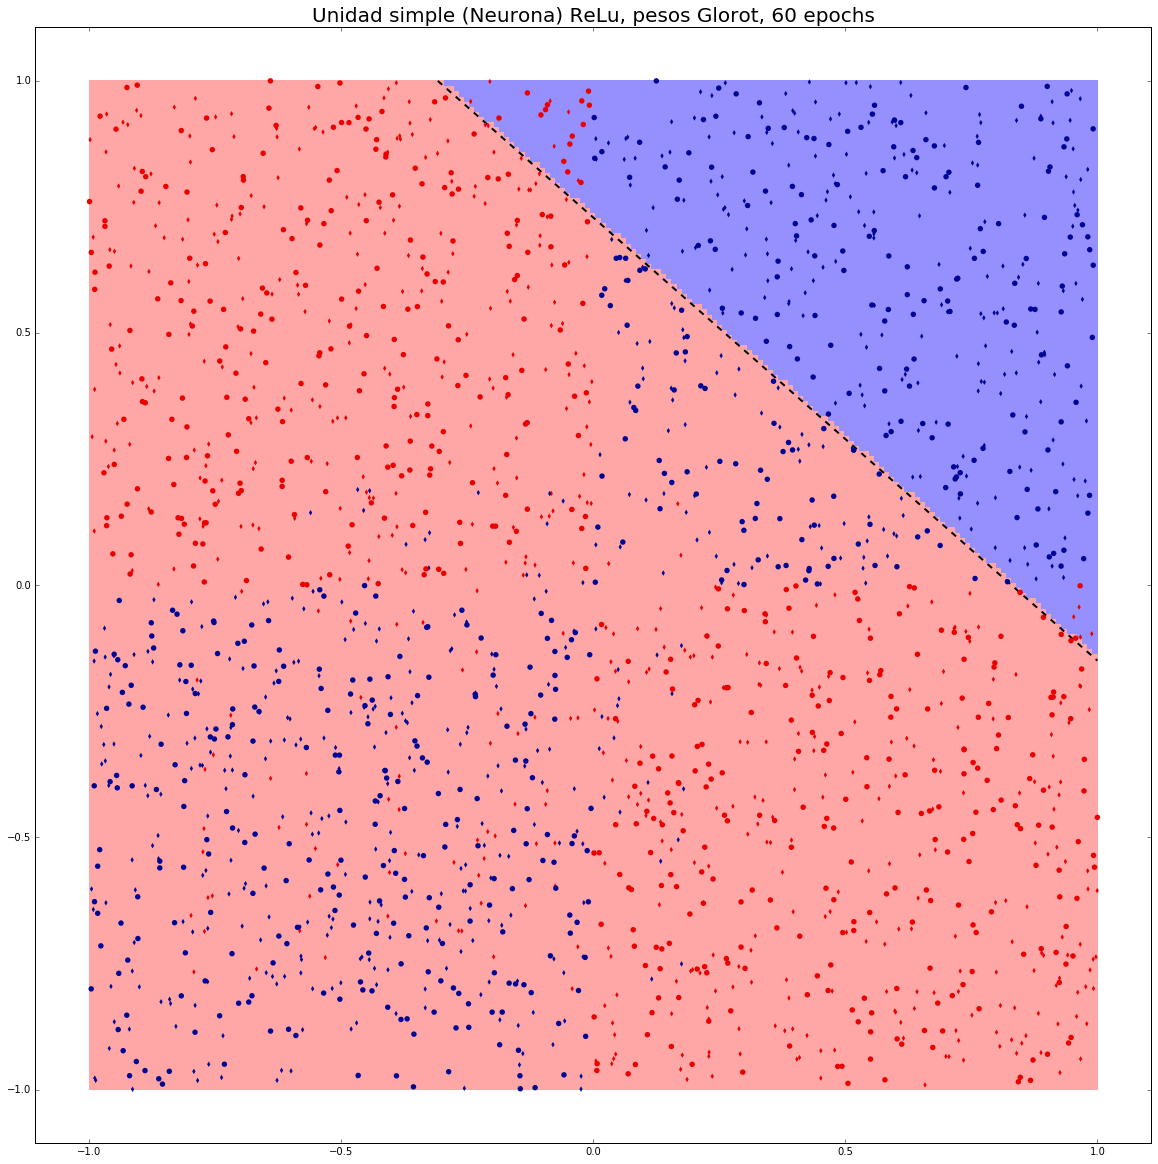

In [34]:
plot_classifier(models_epochs[1],X_train,Y_train,X_test,Y_test,
                'ann', u"Unidad simple (Neurona) ReLu, pesos Glorot, 60 epochs")

Se realizaron experimentos variando los parámetros learning rate, activación y número de epochs. En el gráfico se muestra el hiperplano separador de las clases que produjo uno de los mejores modelos de neurona.

Su accuracy fue inferior a 20%, mientras que su recall fue 0.97. El hiperplano generado con este mecanismo no resuelve satisfactoriamente el problema. Otras neuronas reportaron accuracies superiores, mientras que otras reportaron recalls perfectos, no obstante el plano separador de las clases es pobre, de hecho no se visualiza, la neurona simplemente se encargó de clasificar todos los ejemplos bajo una misma clase.

## e) Red neuronal con una capa escondida para resolver XOR

In [39]:
K = np.arange(1, 6, 1)
number_hidden = np.power(2.0, K).astype(int)

train_errors = []
test_errors = []
models_ann = []
for n_h in number_hidden:
    model = Sequential()
    model.add(Dense(n_h, input_dim=X_train.shape[1], init='uniform', activation='relu'))
    model.add(Dense(1, init='uniform', activation='sigmoid'))
    model.compile(optimizer=SGD(lr=1.0), loss='binary_crossentropy', metrics=['accuracy', 'recall'])
    model.fit(X_train, Y_train, nb_epoch=50, batch_size=100, verbose=0)
    models_ann.append(model)
    scores_test = model.evaluate(X_test, Y_test, verbose=0)
    scores_train = model.evaluate(X_train, Y_train, verbose=0)
    train_errors.append(scores_train[0])
    test_errors.append(scores_test[0])
    print u"# Unidades ocultas: %d"%n_h+"\t Training loss: %.2f"%scores_train[0]+"\t accuracy: %.2f"%scores_train[1]+"\t recall: %.2f"%scores_train[2]
    print u"\t\t\t Testing loss: %.2f"%scores_test[0]+"\t accuracy: %.2f"%scores_test[1]+"\t recall: %.2f"%scores_test[2]

# Unidades ocultas: 2	 Training loss: 0.55	 accuracy: 0.66	 recall: 0.50
			 Testing loss: 0.51	 accuracy: 0.64	 recall: 0.50
# Unidades ocultas: 4	 Training loss: 0.44	 accuracy: 0.71	 recall: 0.96
			 Testing loss: 0.44	 accuracy: 0.71	 recall: 0.95
# Unidades ocultas: 8	 Training loss: 0.31	 accuracy: 0.87	 recall: 0.91
			 Testing loss: 0.23	 accuracy: 0.91	 recall: 0.96
# Unidades ocultas: 16	 Training loss: 0.26	 accuracy: 0.89	 recall: 0.90
			 Testing loss: 0.16	 accuracy: 0.96	 recall: 0.97
# Unidades ocultas: 32	 Training loss: 0.25	 accuracy: 0.89	 recall: 0.90
			 Testing loss: 0.16	 accuracy: 0.96	 recall: 0.96


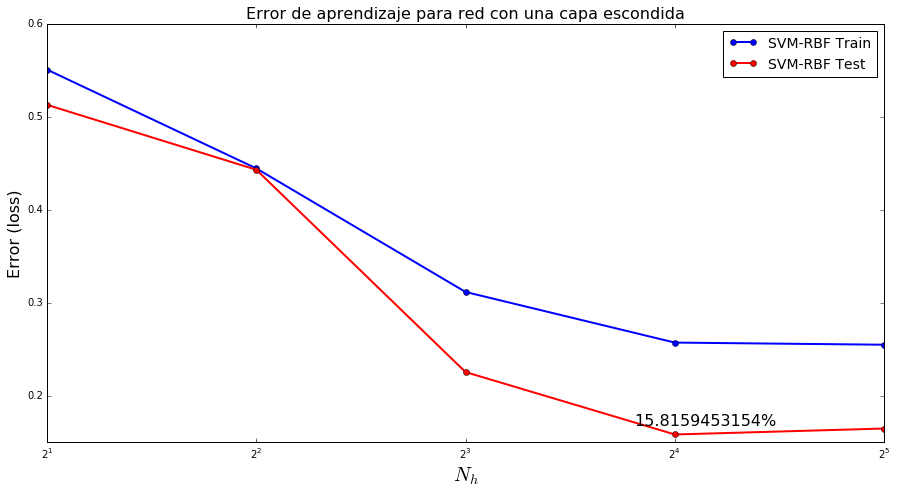

In [40]:
best_loss_id = np.argmin(test_errors)
best_loss = str(test_errors[best_loss_id]*100)+"%"

plt.figure(figsize=(15, 7.5))
plt.title(u"Error de aprendizaje para red con una capa escondida", fontsize=16)
plt.semilogx(number_hidden, train_errors, 'bo-', lw=2.0, label="SVM-RBF Train", basex=2)
plt.semilogx(number_hidden, test_errors, 'ro-', lw=2.0, label="SVM-RBF Test", basex=2)
plt.text(number_hidden[best_loss_id]-2, test_errors[best_loss_id]+1e-2, best_loss, fontsize=16)
plt.xlabel("$N_h$", fontsize=20)
plt.ylabel("Error (loss)", fontsize=16)
plt.xticks(number_hidden)
plt.legend(loc='best', fontsize=14)
plt.show()

Se puede apreciar que a medida que se aumenta el número de neuronas ocultas, la red obtiene mejores resultados. El error más bajo se obtiene con varias unidades ocultas. Esto se explica por que para esta frontera altamente no lineal, se necesitan varias unidades no lineales que combinadas generen la no linealidad buscada.

Es posible que el error test comienza a aumentar porque, por más unidades ocultas que se agreguen, en realidad, no se está aprendiendo más y para reparar ello se requeriría más data, de hecho es posible empeorar tanto en el error de test como en el error de entrenamiento. La reproductibilidad de este comportamiento va asociada a la dependencia de la red de los pesos iniciales.

Como conclusión, una capa escondida permite a la red neuronal resolver satisfactoriamente XOR.

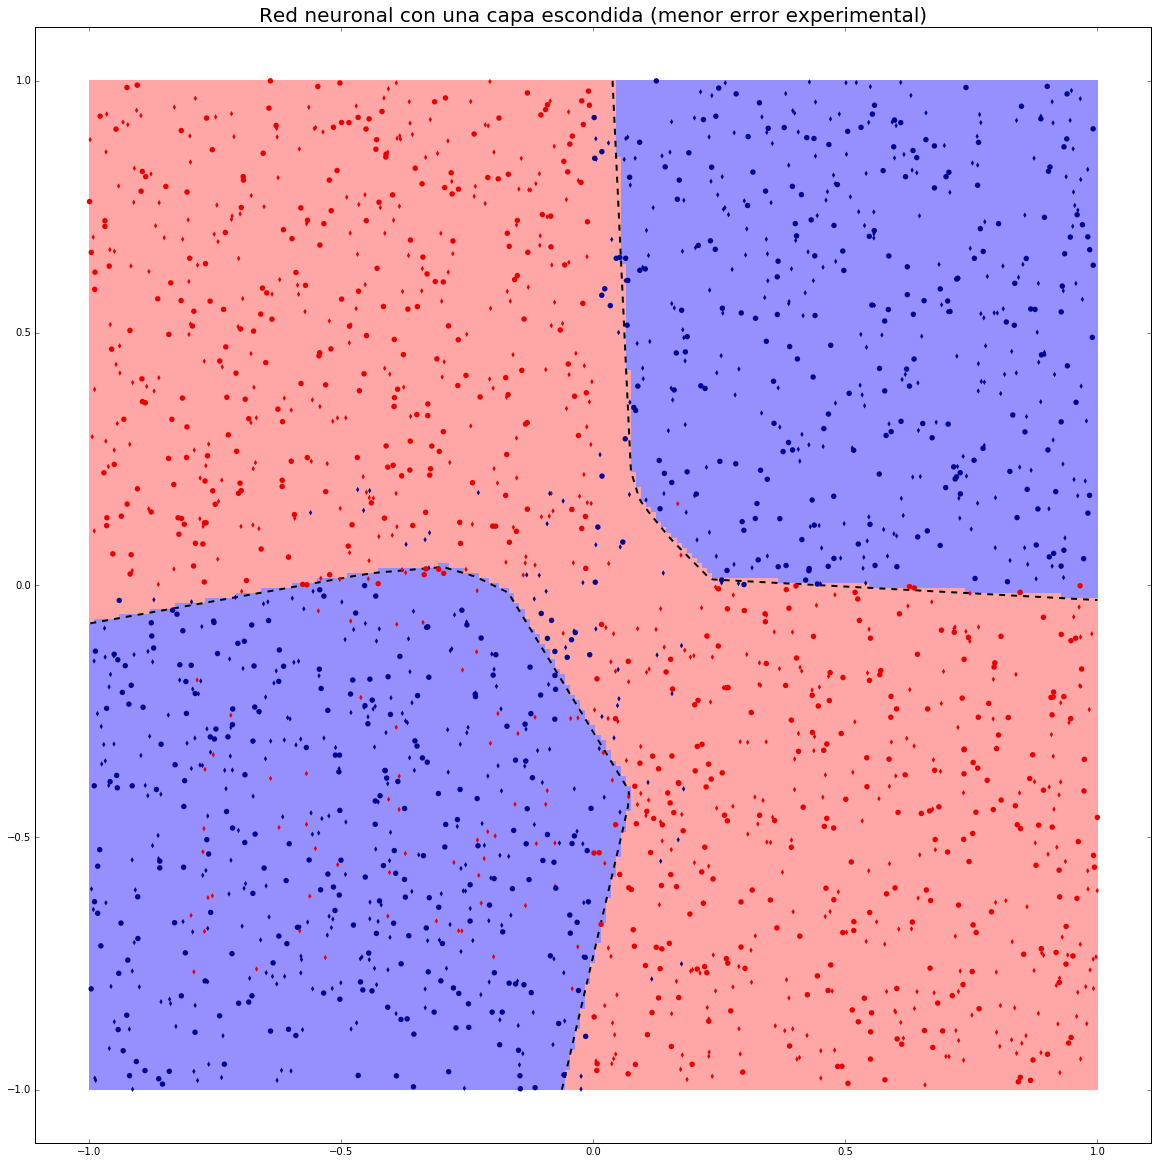

In [41]:
plot_classifier(models_ann[best_loss_id], X_train,Y_train,X_test,Y_test,
                'ann', u"Red neuronal con una capa escondida (menor error experimental)")

## f) Stump para resolver XOR


Variación de Criterio
Criterio: gini	 Test Accuracy = 0.489000 	 profundidad: 1 Probabilidades de clase para los primeros 5 ejemplos:
[[ 0.53179973  0.46820027]
 [ 0.53179973  0.46820027]
 [ 0.53179973  0.46820027]
 [ 0.53179973  0.46820027]
 [ 0.53179973  0.46820027]]
Criterio: entropy	 Test Accuracy = 0.486000 	 profundidad: 1 Probabilidades de clase para los primeros 5 ejemplos:
[[ 0.50457875  0.49542125]
 [ 0.50457875  0.49542125]
 [ 0.50457875  0.49542125]
 [ 0.50457875  0.49542125]
 [ 0.50457875  0.49542125]]

Variación de Split
Split: best	 Test Accuracy = 0.489000 	 profundidad: 1
Probabilidades de clase para los primeros 5 ejemplos:
[[ 0.53179973  0.46820027]
 [ 0.53179973  0.46820027]
 [ 0.53179973  0.46820027]
 [ 0.53179973  0.46820027]
 [ 0.53179973  0.46820027]]
Split: random	 Test Accuracy = 0.491000 	 profundidad: 1
Probabilidades de clase para los primeros 5 ejemplos:
[[ 0.50425733  0.49574267]
 [ 0.50425733  0.49574267]
 [ 0.50425733  0.49574267]
 [ 0.50425733  0.4957

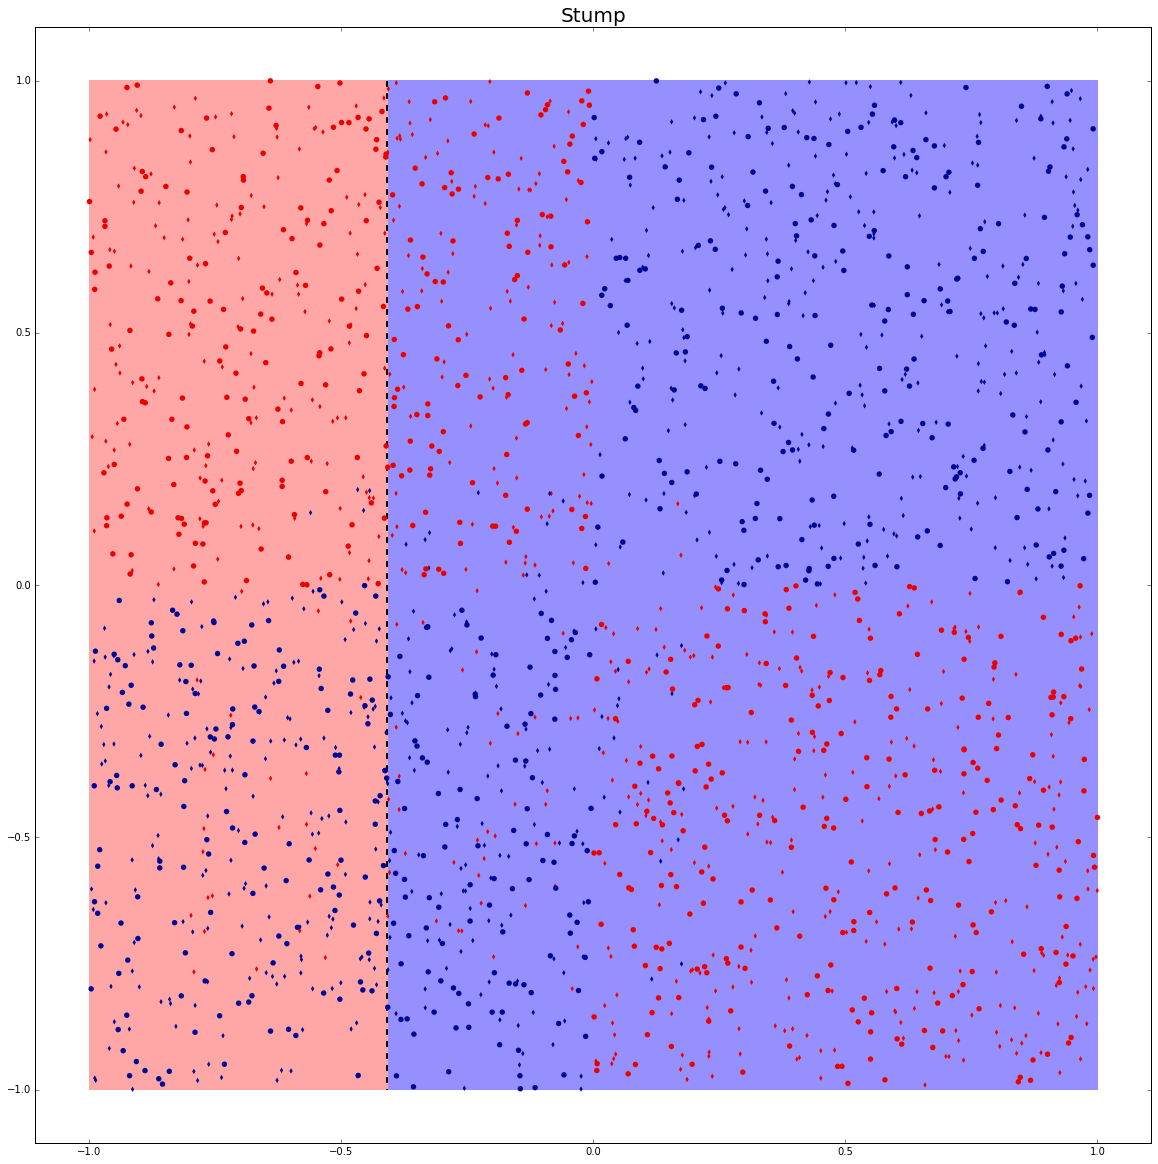

In [70]:
from sklearn.tree import DecisionTreeClassifier as Tree

criterion = ['gini', 'entropy']
split = ['best', 'random']
min_samples_leaf = np.arange(100, 1001, 200)

tree_crit = []
# Variar criterio
print "\nVariación de Criterio"
for c in criterion:
    clf=Tree(criterion=c,splitter='best',random_state=0,max_depth=1)
    clf.fit(X_train,Y_train)
    tree_crit.append(clf)
    acc_test = clf.score(X_test,Y_test)
    print "Criterio: %s" % c + "\t Test Accuracy = %f"%acc_test,"\t profundidad:",clf.tree_.max_depth,
    print "Probabilidades de clase para los primeros 5 ejemplos:"
    print clf.predict_proba(X_test)[:5]

tree_splits = []
# Variar split
print "\nVariación de Split"
for s in split:
    clf=Tree(criterion='gini',splitter=s,random_state=0,max_depth=1)
    clf.fit(X_train,Y_train)
    tree_splits.append(clf)
    acc_test = clf.score(X_test,Y_test)
    print "Split: %s" % s + "\t Test Accuracy = %f"%acc_test,"\t profundidad:",clf.tree_.max_depth
    print "Probabilidades de clase para los primeros 5 ejemplos:"
    print clf.predict_proba(X_test)[:5]

tree_leaf = []
# Variar ejemplos en hojas
print "\nVariación de ejemplos por hoja"
for l in min_samples_leaf:
    clf=Tree(criterion='gini',splitter='random',random_state=0,max_depth=1, min_samples_leaf=l)
    clf.fit(X_train,Y_train)
    tree_leaf.append(clf)
    acc_test = clf.score(X_test,Y_test)
    print "MSL: %d" % l + "\t Test Accuracy = %f"%acc_test,"\t profundidad:",clf.tree_.max_depth
    print "Probabilidades de clase para los primeros 5 ejemplos:"
    print clf.predict_proba(X_test)[:5]

plot_classifier(tree_leaf[0],X_train,Y_train,X_test,Y_test,'tree', "Stump")

Se intenta resolver el problema XOR usando árboles de profundidad 1. Nuevamente nos encontramos con un clasificador que no es capaz de capturar comportamientos no lineales. Se variaron tanto el criterio de medición de calidad del split como también la forma de realizar dicho split y el mínimo de ejemplos por hoja.

Se observa además que las probabilidades asociadas a la elección de la clase dificilmente son distinguibles, una diferencia de 5% separa elegir una clase sobre la otra.

La precisión de estos métodos es pobre por lo que no se puede decir que Stomp resuelva XOR satisfactoriamente.

## g) Árbol de clasificación de varios niveles para resolver XOR

In [82]:
from sklearn.tree import DecisionTreeClassifier as Tree

Nt = np.arange(2, 21, 1)

trees = []
train_tree_errors = []
test_tree_errors = []
# Variar profundidad
for n_t in Nt:
    clf=Tree(criterion='gini',splitter='best',random_state=0,max_depth=n_t)
    clf.fit(X_train,Y_train)
    trees.append(clf)
    acc_test = clf.score(X_test,Y_test)
    acc_train = clf.score(X_train,Y_train)
    test_tree_errors.append(1-acc_test)
    train_tree_errors.append(1-acc_train)

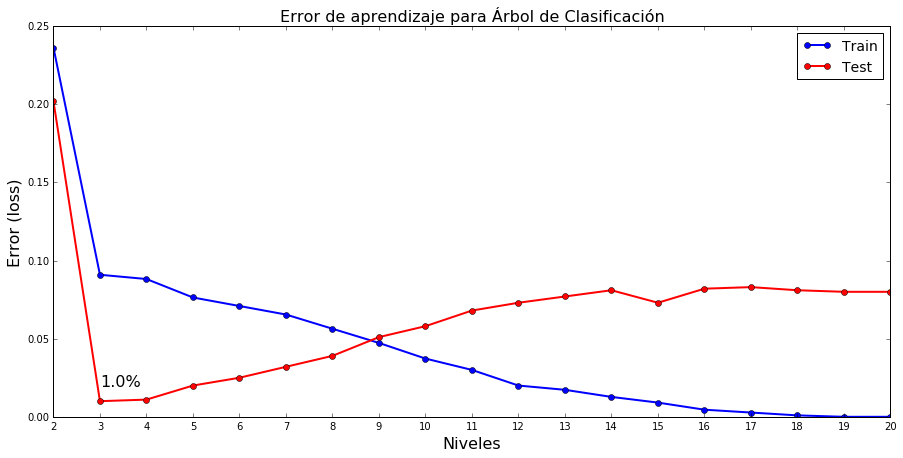

In [101]:
best_loss_id = np.argmin(test_tree_errors)
best_loss = str(test_tree_errors[best_loss_id]*100)+"%"

plt.figure(figsize=(15, 7))
plt.title(u"Error de aprendizaje para Árbol de Clasificación", fontsize=16)
plt.plot(Nt, train_tree_errors, 'bo-', lw=2.0, label="Train")
plt.plot(Nt, test_tree_errors, 'ro-', lw=2.0, label="Test")
plt.text(Nt[best_loss_id], test_tree_errors[best_loss_id]+1e-2, best_loss, fontsize=16)
plt.xlabel("Niveles", fontsize=16)
plt.ylabel("Error (loss)", fontsize=16)
plt.xticks(Nt)
plt.legend(loc='best', fontsize=14)
plt.show()

Se observa que el mejor error de predicción se alcanza con un árbol de 3 niveles. A medida que se aumentan los niveles los errores se mantienen acotados bajo el 10%, pero el régimen de overfitting es dominante, en este experimento, a partir de árboles de profundidad 9. De hecho con un árbol de profundidad 20, el error sobre el conjunto de entrenamiento es exactamente 0, lo que provoca uno de los peores errores de prueba.

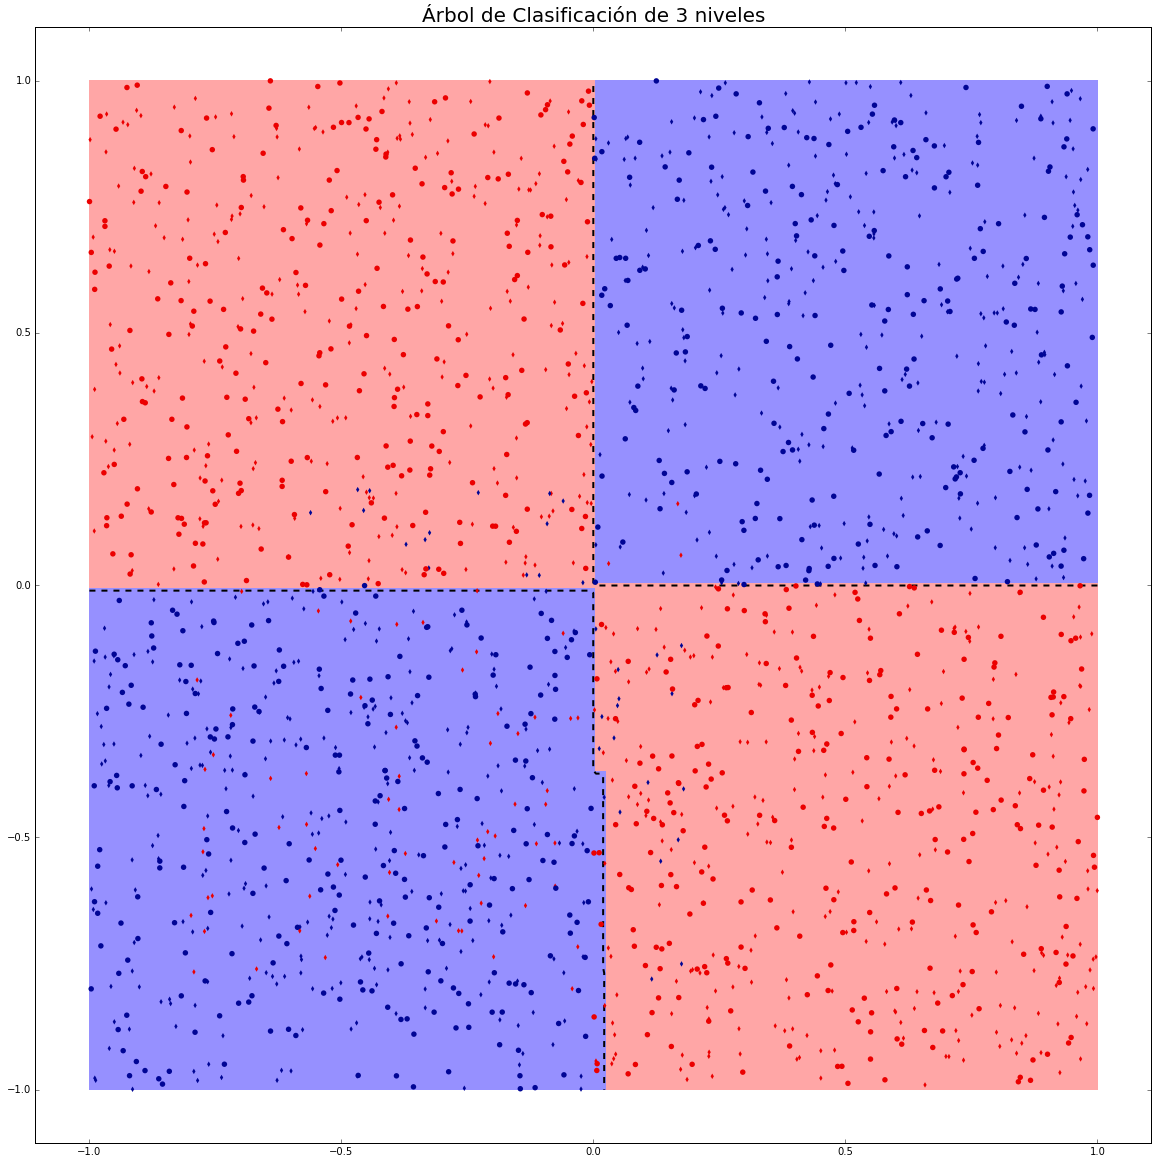

In [108]:
plot_classifier(trees[best_loss_id],X_train,Y_train,X_test,Y_test,'tree', u"Árbol de Clasificación de 3 niveles")

Este gráfico corresponde al árbol que consiguió mejor error de generalización. Se observa que las fronteras son de excelente calidad, no por nada el error de clasificación es de tan solo 1%.